In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np
import pickle

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")

from c_utree_boost import Agent_boost_Galen_action_numpy as Agent
from c_utree_boost import Problem
from split_data import split_data

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
estimator = "DR"
competition = "L"
agent_num = 3
special = "11_contexts"
num_contexts = 11

# Normal Data

In [3]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_11contexts.json')

In [4]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  35%|███▌      | 5757/16384 [00:07<00:14, 724.82it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 5757



DR 1: 100%|██████████| 32768/32768 [00:09<00:00, 3505.82it/s]


AUC predicting P(win):				 0.873017016370078
Estimated Utility	 Mean Error:			 0.5744710875678104
Estimated Utility	 Mean Absolute Error:	 0.6030079610945606



Initialising Policy: 100%|██████████| 16384/16384 [00:15<00:00, 1088.31it/s]


Predicted mu Gammas:  tensor(0.9810, grad_fn=<MinBackward1>) tensor(1.0119, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0284, grad_fn=<MinBackward1>) tensor(0.1431, grad_fn=<MaxBackward1>) tensor(0.0474, grad_fn=<MeanBackward0>)



DR 1:  40%|████      | 13257/32768 [00:20<00:30, 633.72it/s]


Stopping at Epoch 13257
DR 1 Number of samples:  torch.Size([6727, 2])
DR 1 Predicted Gammas:  0.64451224 1.0 0.7607416
agent: 1




DR 2:  38%|███▊      | 6184/16384 [00:02<00:04, 2455.92it/s]


Stopping at Epoch 6184



DR 2: 100%|██████████| 32768/32768 [00:08<00:00, 3700.10it/s]


AUC predicting P(win):				 0.7436428145538915
Estimated Utility	 Mean Error:			 0.352690416838423
Estimated Utility	 Mean Absolute Error:	 0.37111590990927623



Initialising Policy: 100%|██████████| 16384/16384 [00:15<00:00, 1083.08it/s]


Predicted mu Gammas:  tensor(0.9961, grad_fn=<MinBackward1>) tensor(1.0057, grad_fn=<MaxBackward1>) tensor(1.0001, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0374, grad_fn=<MinBackward1>) tensor(0.1143, grad_fn=<MaxBackward1>) tensor(0.0493, grad_fn=<MeanBackward0>)



DR 2:  16%|█▋        | 5356/32768 [00:08<00:43, 633.54it/s]


Stopping at Epoch 5356
DR 2 Number of samples:  torch.Size([6597, 2])
DR 2 Predicted Gammas:  0.7099067 0.8878215 0.7718827
agent: 2




DR 3:  35%|███▌      | 5780/16384 [00:07<00:14, 745.64it/s]


Stopping at Epoch 5780



DR 3: 100%|██████████| 32768/32768 [00:08<00:00, 3687.38it/s]


AUC predicting P(win):				 0.8411980501386545
Estimated Utility	 Mean Error:			 0.766514289514076
Estimated Utility	 Mean Absolute Error:	 0.7984479510450468



Initialising Policy: 100%|██████████| 16384/16384 [00:16<00:00, 1017.44it/s]


Predicted mu Gammas:  tensor(0.9463, grad_fn=<MinBackward1>) tensor(1.0149, grad_fn=<MaxBackward1>) tensor(1.0001, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0498, grad_fn=<MinBackward1>) tensor(0.0697, grad_fn=<MaxBackward1>) tensor(0.0533, grad_fn=<MeanBackward0>)



DR 3:   0%|          | 65/32768 [00:00<00:50, 648.56it/s]

Epoch 00119: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 197/32768 [00:00<00:50, 647.33it/s]

Epoch 00220: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 327/32768 [00:00<00:50, 643.74it/s]

Epoch 00321: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|          | 392/32768 [00:00<00:50, 645.29it/s]

Epoch 00422: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 535/32768 [00:00<00:50, 641.69it/s]

Epoch 00523: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 535
DR 3 Number of samples:  torch.Size([6676, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 1



agent: 0




DR 1:  22%|██▏       | 3636/16384 [00:01<00:05, 2404.90it/s]


Stopping at Epoch 3636
AUC predicting P(win):				 0.7701729712926835
Estimated Utility	 Mean Error:			 0.01939285829381024
Estimated Utility	 Mean Absolute Error:	 0.25635397618696143



DR 1:  20%|█▉        | 6500/32768 [00:01<00:07, 3595.40it/s]

Epoch 06003: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06350: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06607: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  23%|██▎       | 7518/32768 [00:02<00:07, 3587.41it/s]


Epoch 06864: reducing learning rate of group 0 to 4.8000e-06.
Epoch 07121: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07378: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7518
AUC predicting P(win):				 0.7707973581772962
Estimated Utility	 Mean Error:			 0.07965249227303127
Estimated Utility	 Mean Absolute Error:	 0.265950959128341



DR 1:   6%|▋         | 2062/32768 [00:03<00:51, 597.71it/s]


Stopping at Epoch 2062
DR 1 Number of samples:  torch.Size([6606, 2])
DR 1 Predicted Gammas:  0.6307208 0.8031224 0.7071353
agent: 1




DR 2:  12%|█▏        | 1900/16384 [00:00<00:05, 2618.26it/s]


Stopping at Epoch 1900
AUC predicting P(win):				 0.7623892471216311
Estimated Utility	 Mean Error:			 -0.027715892766672467
Estimated Utility	 Mean Absolute Error:	 0.17491860225354883



DR 2:  22%|██▏       | 7313/32768 [00:02<00:07, 3633.28it/s]

Epoch 06691: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07017: reducing learning rate of group 0 to 1.2000e-04.
Epoch 07274: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  23%|██▎       | 7677/32768 [00:02<00:07, 3566.34it/s]

Epoch 07531: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  25%|██▌       | 8279/32768 [00:02<00:07, 3345.58it/s]


Epoch 07788: reducing learning rate of group 0 to 9.6000e-07.
Epoch 08045: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 8279
AUC predicting P(win):				 0.7618318144175724
Estimated Utility	 Mean Error:			 0.019809701648091066
Estimated Utility	 Mean Absolute Error:	 0.1838774296032339



DR 2:   5%|▍         | 1537/32768 [00:02<00:49, 629.83it/s]


Stopping at Epoch 1537
DR 2 Number of samples:  torch.Size([6701, 2])
DR 2 Predicted Gammas:  0.64809793 0.83079267 0.7251782
agent: 2




DR 3:  18%|█▊        | 2913/16384 [00:03<00:17, 774.54it/s]


Stopping at Epoch 2913
AUC predicting P(win):				 0.9029341405788542
Estimated Utility	 Mean Error:			 0.13882346532660692
Estimated Utility	 Mean Absolute Error:	 0.35868461691159564



DR 3:  33%|███▎      | 10863/32768 [00:03<00:06, 3638.58it/s]

Epoch 10223: reducing learning rate of group 0 to 6.0000e-04.
Epoch 10501: reducing learning rate of group 0 to 1.2000e-04.
Epoch 10758: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  36%|███▌      | 11690/32768 [00:03<00:05, 3575.18it/s]


Epoch 11015: reducing learning rate of group 0 to 4.8000e-06.
Epoch 11272: reducing learning rate of group 0 to 9.6000e-07.
Epoch 11529: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 11690
AUC predicting P(win):				 0.9042802126402835
Estimated Utility	 Mean Error:			 0.13882346532660692
Estimated Utility	 Mean Absolute Error:	 0.35868461691159564



DR 3:   1%|          | 198/32768 [00:00<00:50, 646.57it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 393/32768 [00:00<00:50, 641.31it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 586/32768 [00:00<00:51, 629.70it/s]

Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Epoch 00607: reducing learning rate of group 0 to 4.4800e-07.



DR 3:   2%|▏         | 780/32768 [00:01<00:50, 638.25it/s]

Epoch 00708: reducing learning rate of group 0 to 8.9600e-08.
Epoch 00809: reducing learning rate of group 0 to 1.7920e-08.



DR 3:   3%|▎         | 1023/32768 [00:01<00:49, 637.86it/s][A


Stopping at Epoch 1023
DR 3 Number of samples:  torch.Size([6693, 2])
DR 3 Predicted Gammas:  0.98059624 1.0 0.9999971
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:05, 2565.76it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7595596921726803
Estimated Utility	 Mean Error:			 -0.015565741275248911
Estimated Utility	 Mean Absolute Error:	 0.21986748481214455



DR 1:  13%|█▎        | 4393/32768 [00:01<00:07, 3642.01it/s]

Epoch 03916: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04300: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04557: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  16%|█▋        | 5390/32768 [00:01<00:07, 3625.99it/s]


Epoch 04814: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05071: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05328: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5390
AUC predicting P(win):				 0.7597887161750312
Estimated Utility	 Mean Error:			 -0.005192808698573304
Estimated Utility	 Mean Absolute Error:	 0.22446315377254303



DR 1:   8%|▊         | 2628/32768 [00:04<00:51, 589.01it/s]


Stopping at Epoch 2628
DR 1 Number of samples:  torch.Size([6699, 2])
DR 1 Predicted Gammas:  0.61192054 0.78226435 0.6846621
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:06, 2275.94it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7287304916408931
Estimated Utility	 Mean Error:			 -0.011228532127718073
Estimated Utility	 Mean Absolute Error:	 0.22606768761685891



DR 2:  25%|██▌       | 8246/32768 [00:02<00:06, 3611.50it/s]

Epoch 07818: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08076: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08333: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  28%|██▊       | 9264/32768 [00:02<00:06, 3558.56it/s]

Epoch 08590: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08847: reducing learning rate of group 0 to 9.6000e-07.
Epoch 09104: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 9264
AUC predicting P(win):				 0.732812914487747
Estimated Utility	 Mean Error:			 0.01522310805876819
Estimated Utility	 Mean Absolute Error:	 0.23098099567355682




DR 2:   4%|▍         | 1258/32768 [00:02<00:51, 616.60it/s]


Stopping at Epoch 1258
DR 2 Number of samples:  torch.Size([6619, 2])
DR 2 Predicted Gammas:  0.6858266 1.0 0.79913884
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:21, 727.51it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8977696003313115
Estimated Utility	 Mean Error:			 -0.009070917386611794
Estimated Utility	 Mean Absolute Error:	 0.31686107468745633



DR 3:  11%|█         | 3647/32768 [00:01<00:08, 3639.10it/s]

Epoch 03021: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03376: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03633: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  14%|█▎        | 4451/32768 [00:01<00:07, 3615.94it/s]


Epoch 03890: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04147: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04404: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4451
AUC predicting P(win):				 0.8975907784655314
Estimated Utility	 Mean Error:			 -0.009070917386611794
Estimated Utility	 Mean Absolute Error:	 0.31686107468745633



DR 3:   1%|          | 325/32768 [00:00<00:50, 642.92it/s]

Epoch 00235: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00336: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   2%|▏         | 522/32768 [00:00<00:49, 648.61it/s]

Epoch 00437: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   2%|▏         | 719/32768 [00:01<00:49, 648.42it/s]

Epoch 00619: reducing learning rate of group 0 to 1.1200e-05.
Epoch 00720: reducing learning rate of group 0 to 2.2400e-06.



DR 3:   3%|▎         | 914/32768 [00:01<00:49, 637.29it/s]

Epoch 00821: reducing learning rate of group 0 to 4.4800e-07.
Epoch 00922: reducing learning rate of group 0 to 8.9600e-08.



DR 3:   3%|▎         | 1030/32768 [00:01<00:49, 641.94it/s][A


Epoch 01023: reducing learning rate of group 0 to 1.7920e-08.
Stopping at Epoch 1030
DR 3 Number of samples:  torch.Size([6682, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0


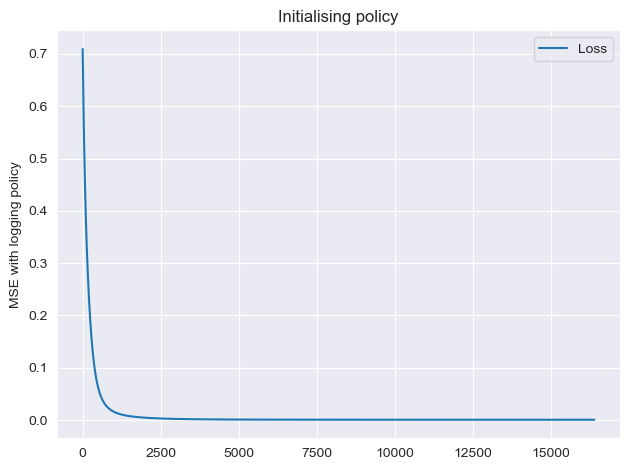

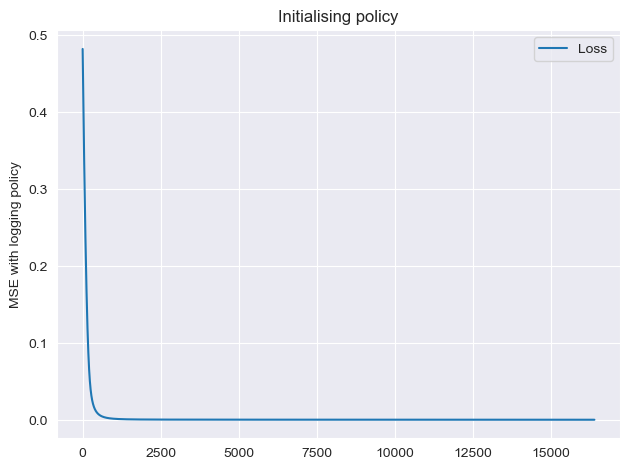

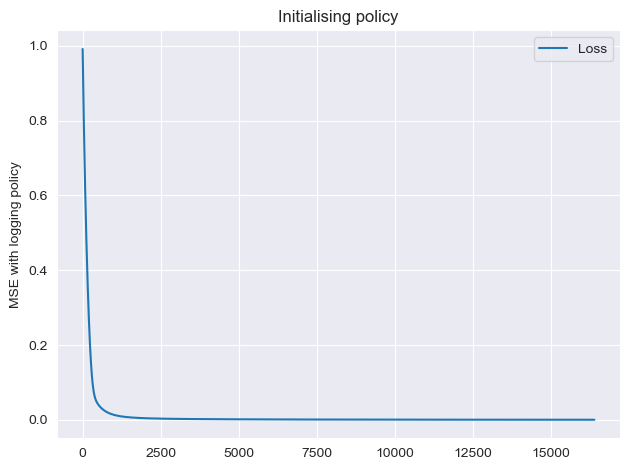

In [5]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

# Save Auction

In [6]:
pickle.dump(auction, open(f'DR_L_auction_{special}.pickle', 'wb'))

In [12]:
auction = pickle.load(open(f'DR_L_auction_{special}.pickle', 'rb'))

# data generation

In [7]:
# data generation
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'val': {}, 'test':{}}


num_data = [80000, 10000, 10000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

# Save Data

In [8]:
special

'11_contexts'

In [9]:
data_dir = f"../data_{estimator}_{competition}_{special}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [10]:
# split_data
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir=f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', special=f'_{special}')

# Read data

In [11]:
offline_data_key = {'context': 0, 'estimated_CTR': num_contexts, 'value': num_contexts+1, 'bid': num_contexts+2, 'gamma': num_contexts+3, 'true_CTR': num_contexts+4, 'price': num_contexts+5, 'second_price': num_contexts+6, 'won_mask': num_contexts+7, 'outcome': num_contexts+8, 'utility': 14}

In [12]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [5]:
offline_data = {'train': {}, 'val': {},'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/train_{agent_id}.csv")
    offline_data['val'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/val_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/test_{agent_id}.csv")

# CUTree

In [50]:
problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=2, split_size=1000,games_directory="../data_DR_H_split_1000/train/")

# disable the max_hist
CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=3000, training_mode='')

max_hist 3000


In [48]:
#for agent_id in offline_data['train'].keys():
min_split_int = 50
for agent_id in range(3):
    for max_depth in [20]:
            problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000,games_directory="../data_DR_L_split_1000/train/")

            CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000, training_mode='')
            print("Agent", agent_id)
            print("Max Depth", max_depth)
            input_train_data = offline_data['train'][agent_id][:, :5]
            label_train_data = offline_data['train'][agent_id][:, 7]

            input_test_data = offline_data['test'][agent_id][:, :5]
            label_test_data = offline_data['test'][agent_id][:, 7]

            train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=53, data_set='train')
            test_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=53, data_set='test')
            print("Train R2 score:", r2_score(label_train_data, train_preds))
            print("Test R2 score:", r2_score(label_test_data, test_preds))
            print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
            print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 1
Max Depth 20
<ipykernel.iostream.OutStream object at 0x103963b50> starting from 53
<ipykernel.iostream.OutStream object at 0x103963b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x103963b50> starting from 53
<ipykernel.iostream.OutStream object at 0x103963b50> finishing read tree
Train R2 score: 0.4672539167145573
Test R2 score: 0.34063893775642085
Train MSE:  0.03379633163649164
Test MSE:  0.041284912327810425


# M5 Tree

In [13]:
from m5py import M5Prime, export_text_m5

In [14]:
# model = M5Prime(use_smoothing=True, use_pruning=False)
# for agent_id in offline_data['train'].keys():
#     input_train_data = offline_data['train'][agent_id][:, :5]
#     label_train_data = offline_data['train'][agent_id][:, 7]
#     print("Agent", agent_id)
#     best_estimator = model.fit(input_train_data, label_train_data)
#     input_test_data = offline_data['test'][agent_id][:, :5]
#     label_test_data = offline_data['test'][agent_id][:, 7]
#
#     train_preds = best_estimator.predict(input_train_data)
#     test_preds = best_estimator.predict(input_test_data)
#     print("Train R2 score:", r2_score(label_train_data, train_preds))
#     print("Test R2 score:", r2_score(label_test_data, test_preds))
#     print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
#     print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

In [15]:
param_grid = {
    'max_depth': [ 20]
    #'min_samples_split': [2, 4, 10, 20, 36, 50]
}

In [16]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = -100
    for max_depth in param_grid['max_depth']:
        #for min_samples_split in param_grid['min_samples_split']:
        model = model_class(max_depth= max_depth, random_state=0)
        model.fit(input_train_data, label_train_data)
        score = model.score(input_val_data, label_val_data)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_)
    return best_model

In [17]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree = {}
# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :num_contexts].astype('float64')
    label_train_data = offline_data['train'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_val_data = offline_data['val'][agent_id][:, :num_contexts].astype('float64')
    label_val_data = offline_data['val'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_test_data = offline_data['test'][agent_id][:, :num_contexts].astype('float64')
    label_test_data = offline_data['test'][agent_id][:, offline_data_key['bid']].astype('float64')

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.6255351074849087
Test R2 score: 0.6159046380546802
Train MSE:  0.012112966058990003
Test MSE:  0.019585692671789126
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.6324444402381795
Test R2 score: 0.6204607159057616
Train MSE:  0.013137690942301588
Test MSE:  0.022555910714067113
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.6727053831932377
Test R2 score: 0.653358867671375
Train MSE:  0.02768519100658405
Test MSE:  0.049156844088375735


In [18]:
# context with bid
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :num_contexts].astype('float64')
    label_train_data = offline_data['train'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_val_data = offline_data['val'][agent_id][:, :num_contexts].astype('float64')
    label_val_data = offline_data['val'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_test_data = offline_data['test'][agent_id][:, :num_contexts].astype('float64')
    label_test_data = offline_data['test'][agent_id][:, offline_data_key['bid']].astype('float64')

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.40507222038053325
Test R2 score: 0.41482839255662207
Train MSE:  0.005250619602890816
Test MSE:  0.029838921265793444
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.3679395431997874
Test R2 score: 0.388832988811311
Train MSE:  0.00625499662266093
Test MSE:  0.03632148005088307
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.45020523157780346
Test R2 score: 0.4264084015480176
Train MSE:  0.010601933468925847
Test MSE:  0.08134047043435055


In [14]:
param_grid

{'max_depth': [5, 10, 25, 50], 'min_samples_split': [2, 4, 10, 20, 50, 100]}

In [25]:
offline_data['train'][2][:, 7].std()

0.06731641454531978

In [24]:
offline_data['train'][0][:, 7].std()

0.15162827522929714

In [41]:
# If the rng record is cleared, use this
rng = np.random.default_rng(0)

In [42]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: 0.004906677055637212
Surrogate utility: 0.005488817879097059
R2 score: 0.8630118454135507
Agent: 1
Original utility: 0.047288165889720034
Surrogate utility: 0.0436259102955381
R2 score: 0.8579546731914592
Agent: 2
Original utility: 0.03137086689375815
Surrogate utility: 0.03045715435526283
R2 score: 0.9170638279535878


<AxesSubplot:>

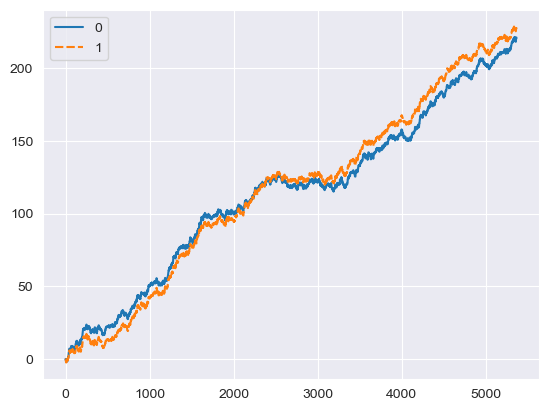

In [245]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

In [316]:
# TODO: add label to features

In [304]:
explainer = shap.TreeExplainer(context_bid_estimators[0])

In [319]:
shap_values = explainer.shap_values(offline_data['test'][0][:, :5])
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [320]:
offline_data['test'][0][:, :5].shape

(5320, 5)

In [321]:
shap_values.shape

(5320, 5)

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

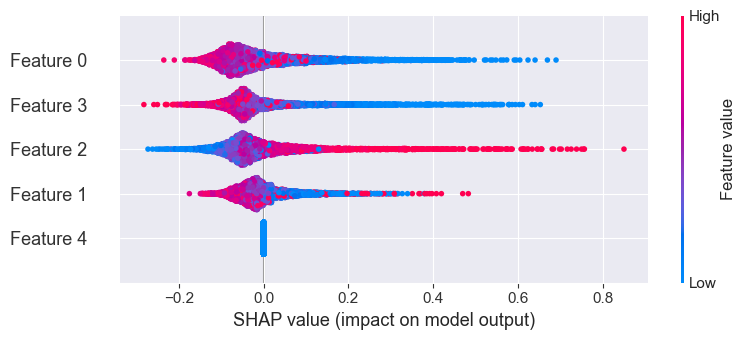

In [322]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [207]:
# # This is for single agent get replaced by surrogate model
#
# surrogate_model = None
# data_set = 'test'
# surrogate_agent_id = 0
# surrogate_bid = test_preds
# j = 0
# for i in range(len(participating_agents_logs[data_set])):
#     bids = []
#     CTRs = []
#     if surrogate_agent_id in participating_agents_logs[data_set][i]:
#         for agent_id in offline_data[data_set].keys():
#             if agent_id == surrogate_agent_id:
#                 bids.append(test_preds[j])
#                 j+=1
#             else:
#                 bids.append(offline_data[data_set][agent_id][j, 7])
#             CTRs.append(offline_data[data_set][agent_id][j, 9])
#         bids = np.array(bids)
#         CTRs = np.array(CTRs)
#         winners = np.argsort(-bids)[:1]
#         outcomes = rng.binomial(1, CTRs[winners])
#         # currently only consider one winner
#         if surrogate_agent_id == winners:
#             surrogate_logs['outcomes'].append(outcomes)
#             surrogate_logs['won_mask'].append(1)
#         else:
#             surrogate_logs['outcomes'].append(0)
#             surrogate_logs['won_mask'].append(0)
#         surrogate_logs['prices'].append(bids[winners])
#     else:
#         pass

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2